In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
import requests
import functools
import yfinance as yf
from datetime import datetime

In [20]:
session = requests.Session()
session.headers.update({'Accept-Encoding': 'gzip, deflate'})
session.request = functools.partial(session.request, timeout=30)

In [21]:
yf.shared._requests = session  # fallback attr names vary by version
try:
    yf.utils._requests = session
    yf.ticker._requests = session
    yf.base._requests = session
except Exception:
    pass

now = datetime.now()
ticker = "AAPL"
start = datetime(now.year - 10, now.month, now.day)
end = now

df = yf.download(ticker, start=start, end=end, auto_adjust=False, progress=False)
print(df.tail())

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2025-08-22  227.759995  227.759995  229.089996  225.410004  226.169998   
2025-08-25  227.160004  227.160004  229.300003  226.229996  226.479996   
2025-08-26  229.309998  229.309998  229.490005  224.690002  226.869995   
2025-08-27  230.490005  230.490005  230.899994  228.259995  228.610001   
2025-08-28  230.735001  230.735001  230.899994  229.335007  230.809998   

Price         Volume  
Ticker          AAPL  
Date                  
2025-08-22  42477800  
2025-08-25  30983100  
2025-08-26  54575100  
2025-08-27  31200700  
2025-08-28   7820307  


### data exploeration

In [22]:
type(df)

pandas.core.frame.DataFrame

In [23]:
df.shape

(2515, 6)

In [24]:
df.isna().sum()

Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64

In [25]:
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,106.291144,108.516769,109.603062,107.317873,108.413487,1.065749e+08
std,69.600115,69.227285,69.907399,68.464379,69.153075,6.014325e+07
min,20.624056,22.584999,22.917500,22.367500,22.500000,7.820307e+06
25%,40.106730,42.541248,42.942499,42.238750,42.576250,6.543385e+07
50%,109.216759,112.279999,114.412498,110.292503,112.680000,9.248270e+07
75%,167.437271,169.340004,171.044998,168.165001,169.425003,1.301368e+08
max,258.103729,259.019989,260.100006,257.630005,258.190002,5.334788e+08


In [26]:
df.dtypes

Price      Ticker
Adj Close  AAPL      float64
Close      AAPL      float64
High       AAPL      float64
Low        AAPL      float64
Open       AAPL      float64
Volume     AAPL        int64
dtype: object

In [27]:
df.dtypes

Price      Ticker
Adj Close  AAPL      float64
Close      AAPL      float64
High       AAPL      float64
Low        AAPL      float64
Open       AAPL      float64
Volume     AAPL        int64
dtype: object

In [28]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2015-08-28,25.459156,28.322500,28.327499,27.885000,28.042500,212657600
2015-08-31,25.340052,28.190001,28.632500,28.000000,28.007500,224917200
2015-09-01,24.207438,26.930000,27.969999,26.840000,27.537500,307383600
2015-09-02,25.245668,28.084999,28.084999,27.282499,27.557501,247555200
2015-09-03,24.802961,27.592501,28.195000,27.510000,28.122499,212935600


In [29]:
df = df.reset_index()

In [30]:
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-08-28,25.459156,28.322500,28.327499,27.885000,28.042500,212657600
1,2015-08-31,25.340052,28.190001,28.632500,28.000000,28.007500,224917200
2,2015-09-01,24.207438,26.930000,27.969999,26.840000,27.537500,307383600
3,2015-09-02,25.245668,28.084999,28.084999,27.282499,27.557501,247555200
4,2015-09-03,24.802961,27.592501,28.195000,27.510000,28.122499,212935600


Text(0, 0.5, 'close price')

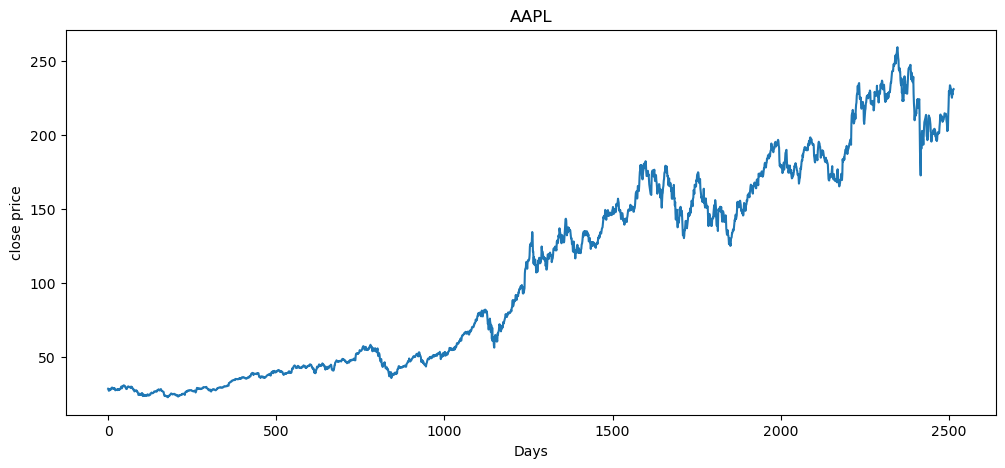

In [34]:
plt.figure(figsize = (12 ,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('close price')

### Feautering Enginneering

In [13]:
# 10  , 20 , 30 , 40 , 50 , 60  , 70 , 80 , 90 , 100
# MA of 5 days ==> null null null null 30

In [35]:
temp_df = [10  , 20 , 30 , 40 , 50 , 60  , 70 , 80 , 90 , 100]
print(sum(temp_df[1:6])/5)

40.0


In [36]:
df1 = pd.DataFrame([10  , 20 , 30 , 40 , 50 , 60  , 70 , 80 , 90 , 100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [37]:
df1['MA_5'] = df1.rolling(5).mean()
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


##### Hundreds Days Moving Average

In [38]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-08-28,25.459156,28.322500,28.327499,27.885000,28.042500,212657600,NaN
1,2015-08-31,25.340052,28.190001,28.632500,28.000000,28.007500,224917200,NaN
2,2015-09-01,24.207438,26.930000,27.969999,26.840000,27.537500,307383600,NaN
3,2015-09-02,25.245668,28.084999,28.084999,27.282499,27.557501,247555200,NaN
4,2015-09-03,24.802961,27.592501,28.195000,27.510000,28.122499,212935600,NaN


In [39]:
df.head(103)

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-08-28,25.459156,28.322500,28.327499,27.885000,28.042500,212657600,NaN
1,2015-08-31,25.340052,28.190001,28.632500,28.000000,28.007500,224917200,NaN
2,2015-09-01,24.207438,26.930000,27.969999,26.840000,27.537500,307383600,NaN
3,2015-09-02,25.245668,28.084999,28.084999,27.282499,27.557501,247555200,NaN
4,2015-09-03,24.802961,27.592501,28.195000,27.510000,28.122499,212935600,NaN
...,...,...,...,...,...,...,...,...
98,2016-01-20,21.844294,24.197500,24.547501,23.355000,23.775000,289337600,NaN
99,2016-01-21,21.733709,24.075001,24.469999,23.735001,24.264999,208646000,27.986025
100,2016-01-22,22.889227,25.355000,25.365000,24.592501,24.657499,263202000,27.956350


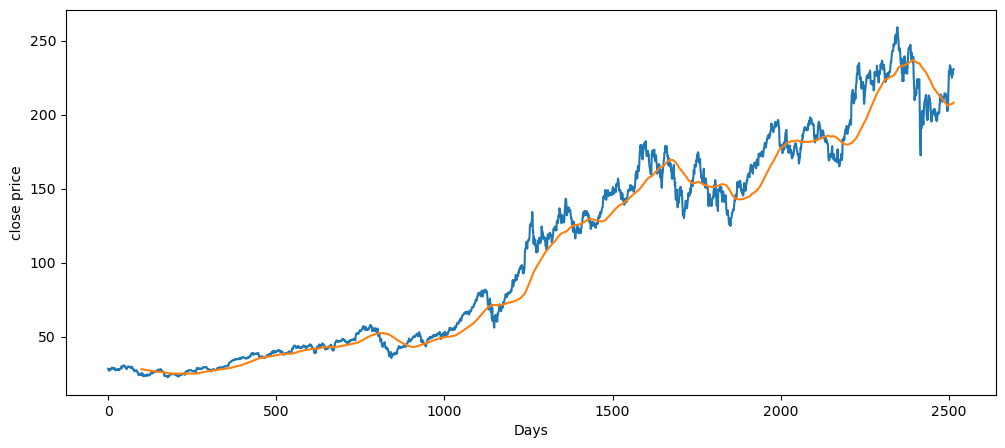

In [40]:
plt.figure(figsize = (12 ,5))
plt.plot(df.Close)
plt.xlabel('Days')
plt.ylabel('close price')
plt.plot(df['MA_100'])

In [23]:
 df

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-08-27,25.376007,28.230000,28.309999,27.504999,28.057501,338464400,NaN
1,2015-08-28,25.459164,28.322500,28.327499,27.885000,28.042500,212657600,NaN
2,2015-08-31,25.340055,28.190001,28.632500,28.000000,28.007500,224917200,NaN
3,2015-09-01,24.207436,26.930000,27.969999,26.840000,27.537500,307383600,NaN
4,2015-09-02,25.245670,28.084999,28.084999,27.282499,27.557501,247555200,NaN
...,...,...,...,...,...,...,...,...
2510,2025-08-21,224.899994,224.899994,226.520004,223.779999,226.270004,30621200,207.29370
2511,2025-08-22,227.759995,227.759995,229.089996,225.410004,226.169998,42477800,207.35000
2512,2025-08-25,227.160004,227.160004,229.300003,226.229996,226.479996,30983100,207.38970


#### Calculating percentage change in each trading session

In [41]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close' , 'Percentage Changed']]

Price,Close,Percentage Changed
Ticker,AAPL,
0,28.322500,NaN
1,28.190001,-0.004678
2,26.930000,-0.044697
3,28.084999,0.042889
4,27.592501,-0.017536
...,...,...
2510,227.759995,0.012717
2511,227.160004,-0.002634
2512,229.309998,0.009465


## Data Preprocessing

In [42]:
df.shape

(2515, 9)

## Spliting Data into Traing and Testing Data

In [43]:
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7) : int(len(df))])
print(data_testing)
print(data_training)

Ticker        AAPL
1760    170.029999
1761    163.619995
1762    161.380005
1763    158.910004
1764    157.220001
...            ...
2510    227.759995
2511    227.160004
2512    229.309998
2513    230.490005
2514    230.735001

[755 rows x 1 columns]
Ticker        AAPL
0        28.322500
1        28.190001
2        26.930000
3        28.084999
4        27.592501
...            ...
1755    174.149994
1756    171.520004
1757    167.570007
1758    167.229996
1759    167.529999

[1760 rows x 1 columns]


In [13]:
data_training
type(data_training)


pandas.core.frame.DataFrame

In [44]:
data_testing

Ticker,AAPL
1760,170.029999
1761,163.619995
1762,161.380005
1763,158.910004
1764,157.220001
...,...
2510,227.759995
2511,227.160004
2512,229.309998
2513,230.490005


## Scaling Down The Data Btw 0 and 1

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0 , 1))

In [46]:
data_training_array = scaler.fit_transform(data_training)


## Sequence creation

In [47]:
x_train = []
y_train = []
for i in range(100 , data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])
x_train , y_train = np.array(x_train) , np.array(y_train)

In [22]:
x_train

array([[[0.03598872],
        [0.03515761],
        [0.0272542 ],
        ...,
        [0.00991063],
        [0.01011448],
        [0.0093461 ]],

       [[0.03515761],
        [0.0272542 ],
        [0.03449898],
        ...,
        [0.01011448],
        [0.0093461 ],
        [0.01737494]],

       [[0.0272542 ],
        [0.03449898],
        [0.03140976],
        ...,
        [0.0093461 ],
        [0.01737494],
        [0.01427004]],

       ...,

       [[0.98086882],
        [0.97340448],
        [0.95358323],
        ...,
        [0.95320689],
        [0.95069782],
        [0.93420109]],

       [[0.97340448],
        [0.95358323],
        [0.95170144],
        ...,
        [0.95069782],
        [0.93420109],
        [0.90942457]],

       [[0.95358323],
        [0.95170144],
        [0.97760707],
        ...,
        [0.93420109],
        [0.90942457],
        [0.90729184]]], shape=(1660, 100, 1))

In [48]:
x_train.shape

(1660, 100, 1)

In [49]:
y_train.shape

(1660,)

In [50]:
x_train.ndim

3

In [51]:
y_train.ndim

1

In [52]:
! pip install tensorflow

In [4]:
! pip install tensorflow

   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/332.0 MB 1.3 MB/s eta 0:04:07
   ---------------------------------------- 1.0/332.0 MB 2.2 MB/s eta 0:02:33
   ---------------------------------------- 1.8/332.0 MB 2.5 MB/s eta 0:02:10
   ---------------------------------------- 2.1/332.0 MB 2.3 MB/s eta 0:02:23
   ---------------------------------------- 2.9/332.0 MB 2.6 MB/s eta 0:02:09
   ---------------------------------------- 3.9/332.0 MB 3.0 MB/s eta 0:01:50
    --------------------------------------- 4.5/332.0 MB 2.9 MB/s eta 0:01:52
    --------------------------------------- 5.5/332.0 MB 3.2 MB/s eta 0:01:42
    --------------------------------------- 6.6/332.0 MB 3.4 MB/s eta 0:01:35
    --------------------------------------- 7.3/332.0 MB 3.5 MB/s eta 0:01:34
   - -------------------------------------- 8.4/332.0 MB 3.6 MB/s eta 0:01:32


In [5]:
!pip install tensorflow

In [53]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [54]:
from keras.models import Sequential
from keras.layers import Dense , LSTM , Input

In [55]:
model = Sequential()
model.add(Input(shape = (100 , 1)))
model.add(LSTM(units = 128 , activation = 'tanh' , return_sequences = True))
model.add(LSTM(units = 64 ))
model.add(Dense(25))
model.add(Dense(1))

# Training MODEl

In [57]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')
model.fit(x_train , y_train , epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - loss: 0.0094
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 6.4190e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 6.0406e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 5.6775e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 6.2432e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 5.7623e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 5.1590e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 4.7016e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 4.8268e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 4.1029e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 3.8031e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 5.1544e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 5.8082e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 4.7732e-04
Epoch 15/50

In [58]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

## Save The Trained Model

In [59]:
model.save('stock_prediction_model.keras')

# Preparing Test Data

In [60]:

data_testing

Ticker,AAPL
1760,170.029999
1761,163.619995
1762,161.380005
1763,158.910004
1764,157.220001
...,...
2510,227.759995
2511,227.160004
2512,229.309998
2513,230.490005


In [61]:
data_training

Ticker,AAPL
0,28.322500
1,28.190001
2,26.930000
3,28.084999
4,27.592501
...,...
1755,174.149994
1756,171.520004
1757,167.570007
1758,167.229996


In [62]:
past_100_Days = data_training.tail(100)
past_100_Days

Ticker,AAPL
1660,174.309998
1661,178.440002
1662,175.059998
1663,171.830002
1664,172.139999
...,...
1755,174.149994
1756,171.520004
1757,167.570007
1758,167.229996


In [64]:
final_df = pd.concat([past_100_Days , data_testing] , ignore_index = True)
final_df

Ticker,AAPL
0,174.309998
1,178.440002
2,175.059998
3,171.830002
4,172.139999
...,...
850,227.759995
851,227.160004
852,229.309998
853,230.490005


In [65]:
input_data = scaler.fit_transform(final_df)
input_data

array([[3.67835849e-01],
       [3.98656782e-01],
       [3.73432864e-01],
       [3.49328417e-01],
       [3.51641832e-01],
       [3.36343300e-01],
       [3.03955266e-01],
       [3.18209026e-01],
       [3.38656715e-01],
       [3.00522380e-01],
       [2.98880694e-01],
       [3.16268654e-01],
       [3.15000011e-01],
       [3.08955253e-01],
       [2.74402976e-01],
       [2.82537391e-01],
       [2.37164240e-01],
       [2.35447854e-01],
       [2.88208992e-01],
       [2.43507456e-01],
       [2.45820985e-01],
       [2.57164187e-01],
       [3.05970224e-01],
       [2.36940369e-01],
       [2.40746298e-01],
       [2.01791063e-01],
       [2.20074623e-01],
       [1.60298542e-01],
       [1.30895537e-01],
       [1.64850785e-01],
       [1.53134312e-01],
       [1.80746345e-01],
       [1.17910534e-01],
       [9.20150012e-02],
       [9.38059732e-02],
       [1.35000037e-01],
       [1.14477648e-01],
       [1.15671705e-01],
       [1.40000024e-01],
       [1.83731374e-01],


In [66]:
input_data.shape

(855, 1)

In [67]:
x_test = []
y_test = []
for i in range(100 , input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i , 0])
    

In [68]:
x_test , y_test = np.array(x_test) , np.array(y_test)

In [69]:
x_test

array([[[0.36783585],
        [0.39865678],
        [0.37343286],
        ...,
        [0.31753741],
        [0.31500001],
        [0.31723884]],

       [[0.39865678],
        [0.37343286],
        [0.34932842],
        ...,
        [0.31500001],
        [0.31723884],
        [0.33589556]],

       [[0.37343286],
        [0.34932842],
        [0.35164183],
        ...,
        [0.31723884],
        [0.33589556],
        [0.28805971]],

       ...,

       [[0.73783588],
        [0.58335829],
        [0.47283591],
        ...,
        [0.74537316],
        [0.76671645],
        [0.7622389 ]],

       [[0.58335829],
        [0.47283591],
        [0.42119413],
        ...,
        [0.76671645],
        [0.7622389 ],
        [0.77828363]],

       [[0.47283591],
        [0.42119413],
        [0.35373137],
        ...,
        [0.7622389 ],
        [0.77828363],
        [0.78708966]]], shape=(755, 100, 1))

In [70]:
y_test

array([3.35895557e-01, 2.88059707e-01, 2.71343361e-01, 2.52910515e-01,
       2.40298555e-01, 2.45820985e-01, 2.29776139e-01, 2.20223909e-01,
       2.30895611e-01, 2.19701580e-01, 2.41417913e-01, 2.86641778e-01,
       2.15074637e-01, 2.26044796e-01, 2.04104478e-01, 1.91641804e-01,
       2.19850752e-01, 2.37910441e-01, 2.14179151e-01, 2.06865749e-01,
       1.89626847e-01, 1.92164247e-01, 1.99552234e-01, 1.85223889e-01,
       1.30298508e-01, 9.83582168e-02, 1.30074637e-01, 1.57313512e-01,
       1.59552227e-01, 1.52313412e-01, 1.12462691e-01, 1.14925391e-01,
       1.04179104e-01, 9.94029885e-02, 1.34104551e-01, 9.97015597e-02,
       1.29776179e-01, 1.39776152e-01, 1.40597053e-01, 1.37089581e-01,
       1.66044843e-01, 1.82313445e-01, 2.03880606e-01, 1.81567245e-01,
       1.47611997e-01, 2.29253810e-01, 2.11343293e-01, 1.91268647e-01,
       1.49328383e-01, 1.03432903e-01, 9.97015597e-02, 1.03731361e-01,
       1.08059733e-01, 7.35074555e-02, 1.63059699e-01, 1.84179117e-01,
      

# Making Predictiona

In [71]:
 y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step


In [73]:
y_predicted

array([[0.305513  ],
       [0.31216016],
       [0.29959923],
       [0.2818904 ],
       [0.2632133 ],
       [0.24719337],
       [0.24032499],
       [0.23238505],
       [0.22385408],
       [0.22228724],
       [0.21875505],
       [0.22391632],
       [0.24599335],
       [0.23648667],
       [0.22708437],
       [0.21292011],
       [0.19860499],
       [0.19977725],
       [0.21105322],
       [0.21220937],
       [0.20778723],
       [0.19734952],
       [0.19018018],
       [0.18905173],
       [0.1848802 ],
       [0.16267772],
       [0.13374615],
       [0.12354015],
       [0.13067812],
       [0.1411242 ],
       [0.14645167],
       [0.13510156],
       [0.12384905],
       [0.11283117],
       [0.10405   ],
       [0.10980388],
       [0.10680708],
       [0.11189747],
       [0.12071588],
       [0.12778345],
       [0.13064256],
       [0.14078343],
       [0.15482919],
       [0.17240472],
       [0.17671765],
       [0.16416803],
       [0.18005213],
       [0.191

In [74]:
y_test

array([3.35895557e-01, 2.88059707e-01, 2.71343361e-01, 2.52910515e-01,
       2.40298555e-01, 2.45820985e-01, 2.29776139e-01, 2.20223909e-01,
       2.30895611e-01, 2.19701580e-01, 2.41417913e-01, 2.86641778e-01,
       2.15074637e-01, 2.26044796e-01, 2.04104478e-01, 1.91641804e-01,
       2.19850752e-01, 2.37910441e-01, 2.14179151e-01, 2.06865749e-01,
       1.89626847e-01, 1.92164247e-01, 1.99552234e-01, 1.85223889e-01,
       1.30298508e-01, 9.83582168e-02, 1.30074637e-01, 1.57313512e-01,
       1.59552227e-01, 1.52313412e-01, 1.12462691e-01, 1.14925391e-01,
       1.04179104e-01, 9.94029885e-02, 1.34104551e-01, 9.97015597e-02,
       1.29776179e-01, 1.39776152e-01, 1.40597053e-01, 1.37089581e-01,
       1.66044843e-01, 1.82313445e-01, 2.03880606e-01, 1.81567245e-01,
       1.47611997e-01, 2.29253810e-01, 2.11343293e-01, 1.91268647e-01,
       1.49328383e-01, 1.03432903e-01, 9.97015597e-02, 1.03731361e-01,
       1.08059733e-01, 7.35074555e-02, 1.63059699e-01, 1.84179117e-01,
      

In [75]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1 , 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1 , 1)).flatten()

In [76]:
y_predicted

array([165.95874 , 166.84946 , 165.16629 , 162.7933  , 160.29059 ,
       158.1439  , 157.22354 , 156.15959 , 155.01643 , 154.80649 ,
       154.33318 , 155.0248  , 157.98311 , 156.7092  , 155.4493  ,
       153.5513  , 151.63307 , 151.79015 , 153.30113 , 153.45605 ,
       152.86348 , 151.46483 , 150.50414 , 150.35292 , 149.79395 ,
       146.81882 , 142.94197 , 141.57437 , 142.53087 , 143.93063 ,
       144.64452 , 143.1236  , 141.61577 , 140.13937 , 138.96269 ,
       139.73372 , 139.33214 , 140.01425 , 141.19592 , 142.14299 ,
       142.52611 , 143.88496 , 145.7671  , 148.12222 , 148.70015 ,
       147.01852 , 149.14697 , 150.67038 , 150.54916 , 148.10654 ,
       143.96063 , 140.75826 , 139.09776 , 138.62956 , 137.23624 ,
       139.81508 , 143.66658 , 146.0745  , 147.76541 , 148.1457  ,
       148.66026 , 149.19304 , 148.3889  , 148.30829 , 148.77065 ,
       148.20619 , 146.28752 , 143.73212 , 144.20287 , 145.43925 ,
       146.30788 , 146.36284 , 144.91043 , 142.9194  , 142.030

In [77]:
y_test

array([170.02999878, 163.61999512, 161.38000488, 158.91000366,
       157.22000122, 157.96000671, 155.80999756, 154.52999878,
       155.96000671, 154.46000671, 157.36999512, 163.42999268,
       153.83999634, 155.30999756, 152.36999512, 150.69999695,
       154.47999573, 156.8999939 , 153.72000122, 152.74000549,
       150.42999268, 150.77000427, 151.75999451, 149.83999634,
       142.47999573, 138.19999695, 142.44999695, 146.1000061 ,
       146.3999939 , 145.42999268, 140.08999634, 140.41999817,
       138.97999573, 138.33999634, 142.99000549, 138.38000488,
       142.41000366, 143.75      , 143.86000061, 143.38999939,
       147.27000427, 149.44999695, 152.33999634, 149.3500061 ,
       144.80000305, 155.74000549, 153.33999634, 150.6499939 ,
       145.02999878, 138.88000488, 138.38000488, 138.91999817,
       139.5       , 134.86999512, 146.86999512, 149.69999695,
       148.27999878, 150.03999329, 148.78999329, 150.72000122,
       151.28999329, 148.00999451, 150.17999268, 151.07

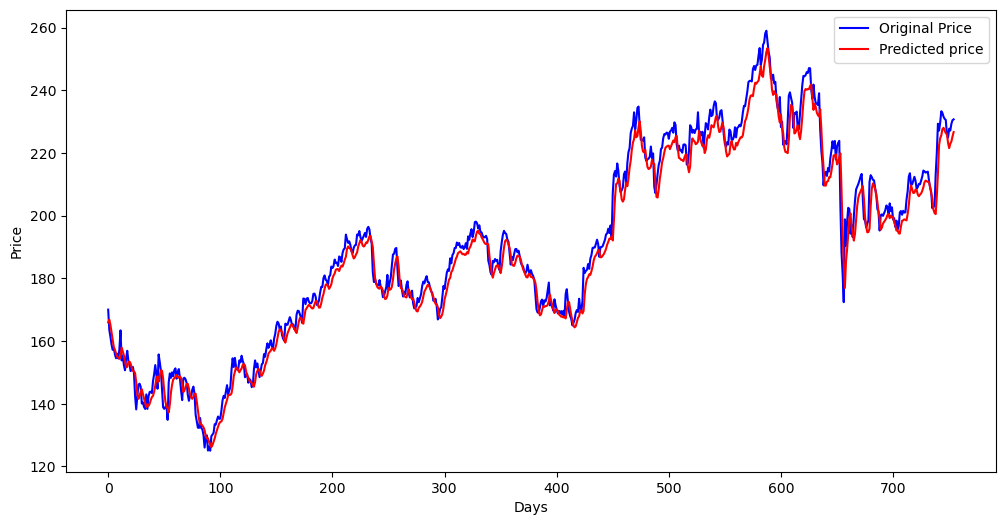

In [82]:
plt.figure(figsize=(12 , 6))
plt.plot(y_test , 'b' , label = 'Original Price')
plt.plot(y_predicted , 'r' , label = 'Predicted price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

(140.0, 620.0)

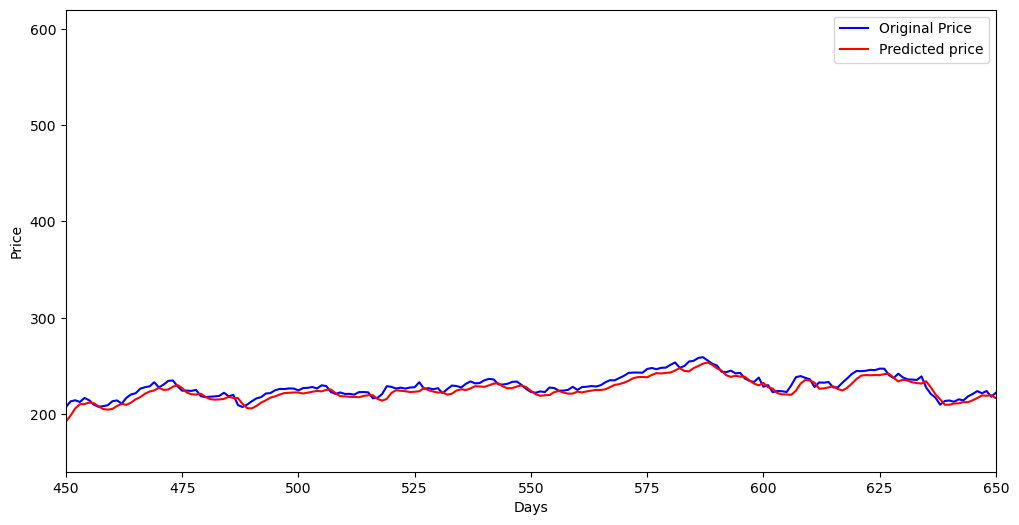

In [86]:
plt.figure(figsize=(12 , 6))
plt.plot(y_test , 'b' , label = 'Original Price')
plt.plot(y_predicted , 'r' , label = 'Predicted price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(450 , 650)
plt.ylim(140 , 620)

#Model Evaluation

# Mean Squared Error 

In [92]:
from sklearn.metrics import mean_squared_error , r2_score

In [88]:
mse =  mean_squared_error(y_test , y_predicted)
print(f"Mean Squared Error(MSE):{mse}")

Mean Squared Error(MSE):21.016880257693753


# Root Mean Squared Error 

In [89]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared (MSE):{rmse}")

Root Mean Squared (MSE):4.58441711209765


# R-Squared

In [93]:
r2 = r2_score(y_test , y_predicted)
print(f"R-Squared: {r2}")

R-Squared: 0.9780563435015008
